In [39]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'roman-pandeia':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [62]:
import numpy as np
import time

from pprint import pprint
from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt

from pandeia.engine.perform_calculation import perform_calculation
from pandeia.engine.calc_utils import build_default_calc, build_default_source
from lenstronomy.Util import data_util
from lenstronomy.SimulationAPI.ObservationConfig.Roman import Roman

from package.pandeia import pandeia_input
from package.helpers import test_physical_lens, test_physical_lens_2
from package.plots import plot, diagnostic_plot

plt.style.use(f'{repo_path}/package/mplstyle/science.mplstyle')

In [54]:
oversample_factor_list = [1, 3, 5, 7, 9]
execution_time = []

csv = os.path.join(repo_path, 'data', 'roman_spacecraft_and_instrument_parameters.csv')
figure_dir = os.path.join(repo_path, 'figures')
array_dir = os.path.join(repo_path, 'output', 'arrays')

lens = test_physical_lens.TestPhysicalLens()
lens_2 = test_physical_lens_2.TestPhysicalLens2()

In [42]:
lenstronomy_roman_config = Roman(band='F106', psf_type='PIXEL', survey_mode='wide_area').kwargs_single_band()
magnitude_zero_point = lenstronomy_roman_config.get('magnitude_zero_point')

In [43]:
# TODO for testing
oversample_factor = oversample_factor_list[0]

In [44]:
physical_lens = test_physical_lens.TestPhysicalLens()
model = physical_lens.get_array(num_pix=45 * oversample_factor, side=5.2)

calc = pandeia_input.build_pandeia_calc(csv=csv, array=model, lens=physical_lens, band='f106', oversample_factor=oversample_factor)

100%|██████████| 45/45 [00:00<00:00, 5564.05it/s]


Converting (45, 45) array to point sources...


  0%|          | 0/45 [00:00<?, ?it/s]

100%|██████████| 45/45 [00:27<00:00,  1.66it/s]

Point source conversion complete: 2025 point sources


In [45]:
detector, execution_time = pandeia_input.get_pandeia_image(calc)

Performing Pandeia calculation...


/data/bwedig/.conda/envs/pandeia/lib/python3.9/site-packages/pandeia/engine/report.py:1012: RuntimeWarning: divide by zero encountered in log
  if np.log(abs(val)) < -1*precision and val != 0.0:


Pandeia calculation complete


In [46]:
print(detector.shape)

(53, 53)


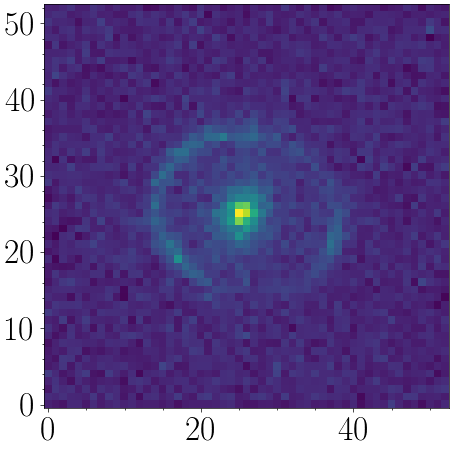

In [63]:
plot.plot(None, None, detector)